In [1]:
!nvidia-smi

Fri Jul 12 08:37:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/car.zip

[Errno 20] Not a directory: '/content/drive/MyDrive/car.zip'
/content


In [11]:
!unzip /content/drive/MyDrive/car.zip -d /content/drive/MyDrive/d1


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Archive:  /content/drive/MyDrive/car.zip
  inflating: /content/drive/MyDrive/d1/car/README.dataset.txt  
  inflating: /content/drive/MyDrive/d1/car/README.roboflow.txt  
  inflating: /content/drive/MyDrive/d1/car/test/labels/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.txt  
  inflating: /content/drive/MyDrive/d1/car/test/labels/Cars386_png.rf.bc9f03aff0435d7ad2c8f9880ee2c316.txt  
  inflating: /content/drive/MyDrive/d1/car/test/labels/Cars37_png.rf.126193ac25a64b7af99f6ba2df6a57de.txt  
  inflating: /content/drive/MyDrive/d1/car/test/images/no_damage_57_jpg.rf.ec7d0a849593e84ceac8584cad90441a.jpg  
  inflating: /content/drive/MyDrive/d1/car/test/labels/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.txt  
  inflating: /content/drive/MyDrive/d1/car/test/labels/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.txt  
  inflating: /content/drive/MyDrive/d1/car/test/labels/C

In [14]:
!pwd

/content/drive/MyDrive/car


In [15]:
%cd /content/drive/MyDrive/d1/car

/content/drive/MyDrive/d1/car


In [16]:
!ls


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [18]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [19]:
!ls runs/detect/train/

args.yaml  weights


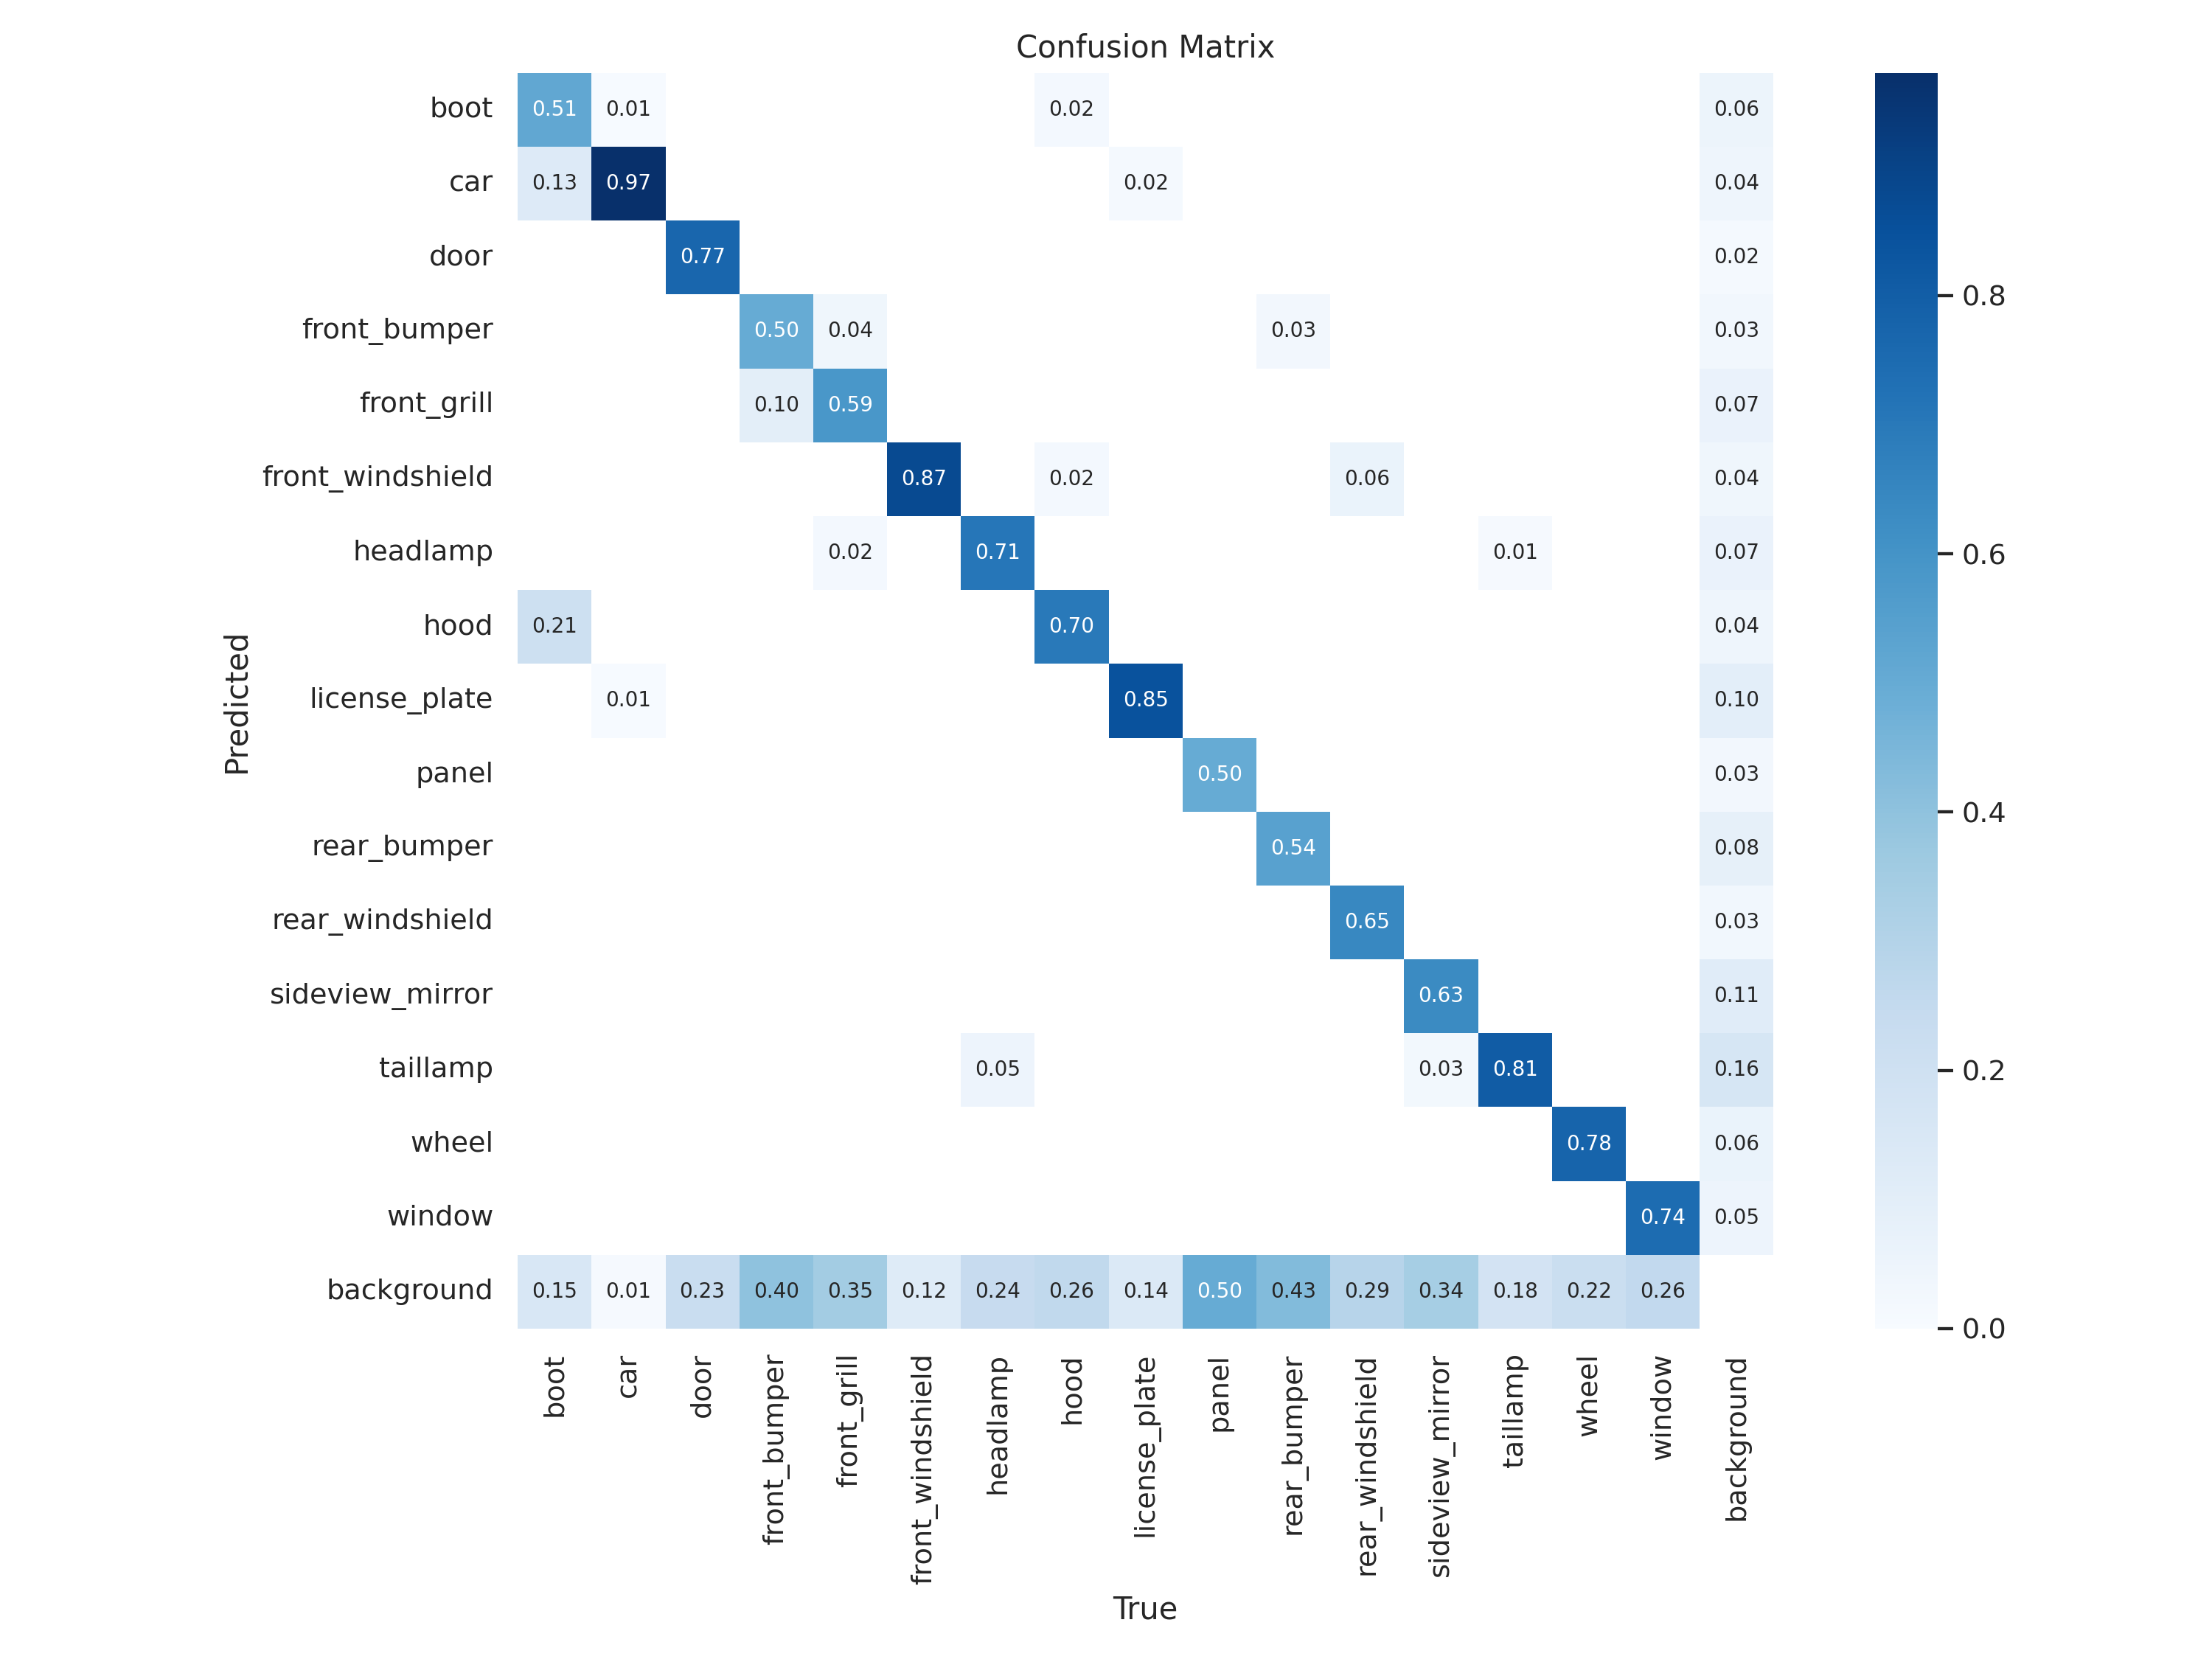

In [20]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

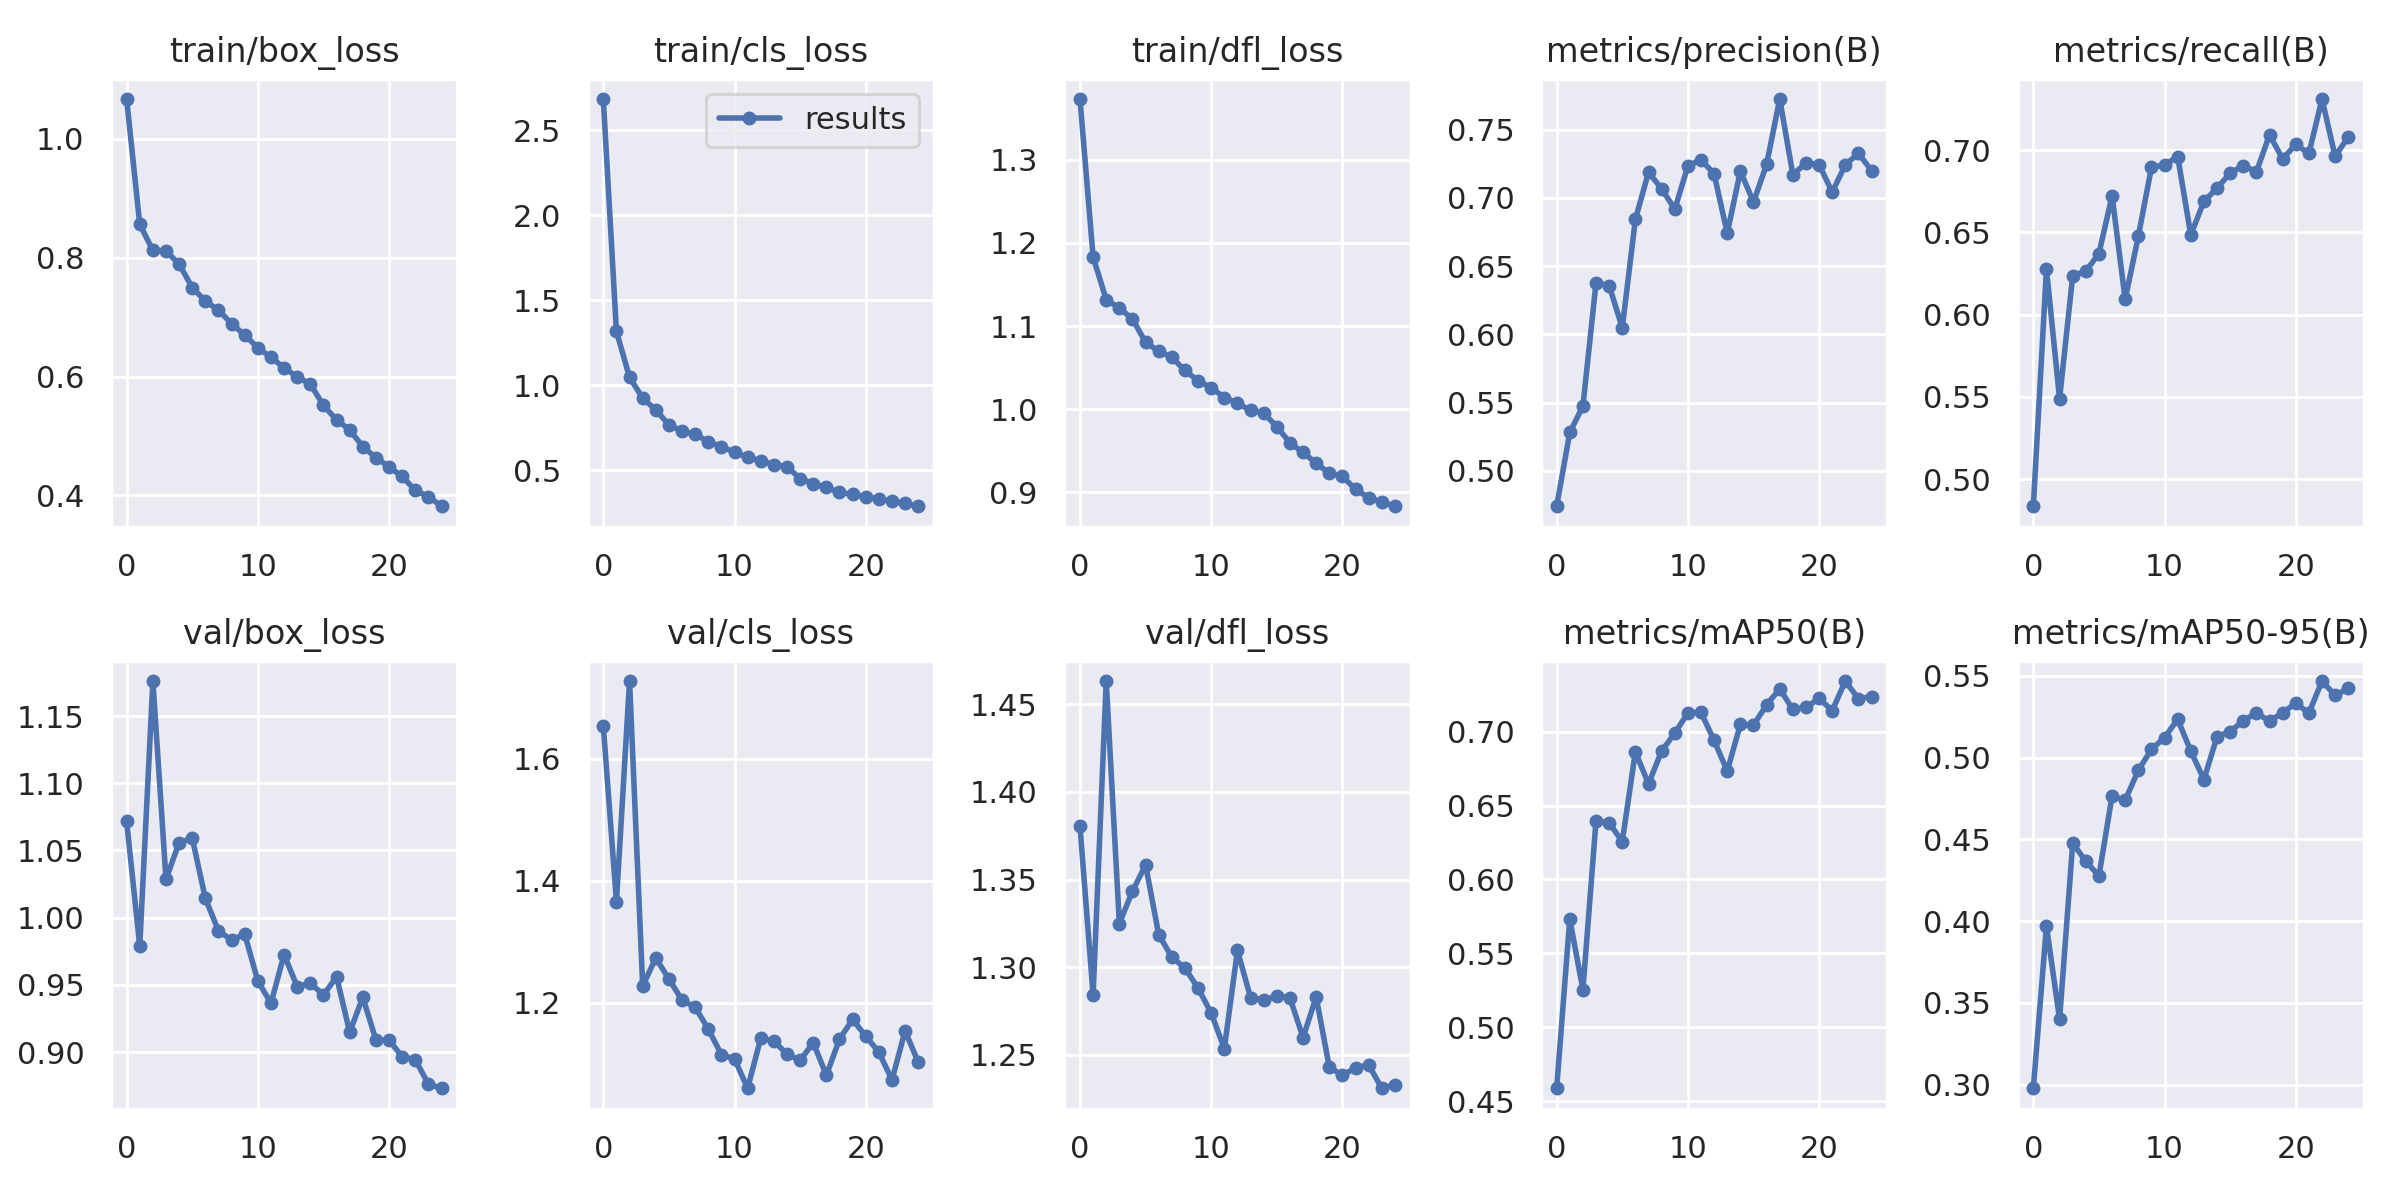

In [21]:
Image(filename='runs/detect/train2/results.png', width=600)

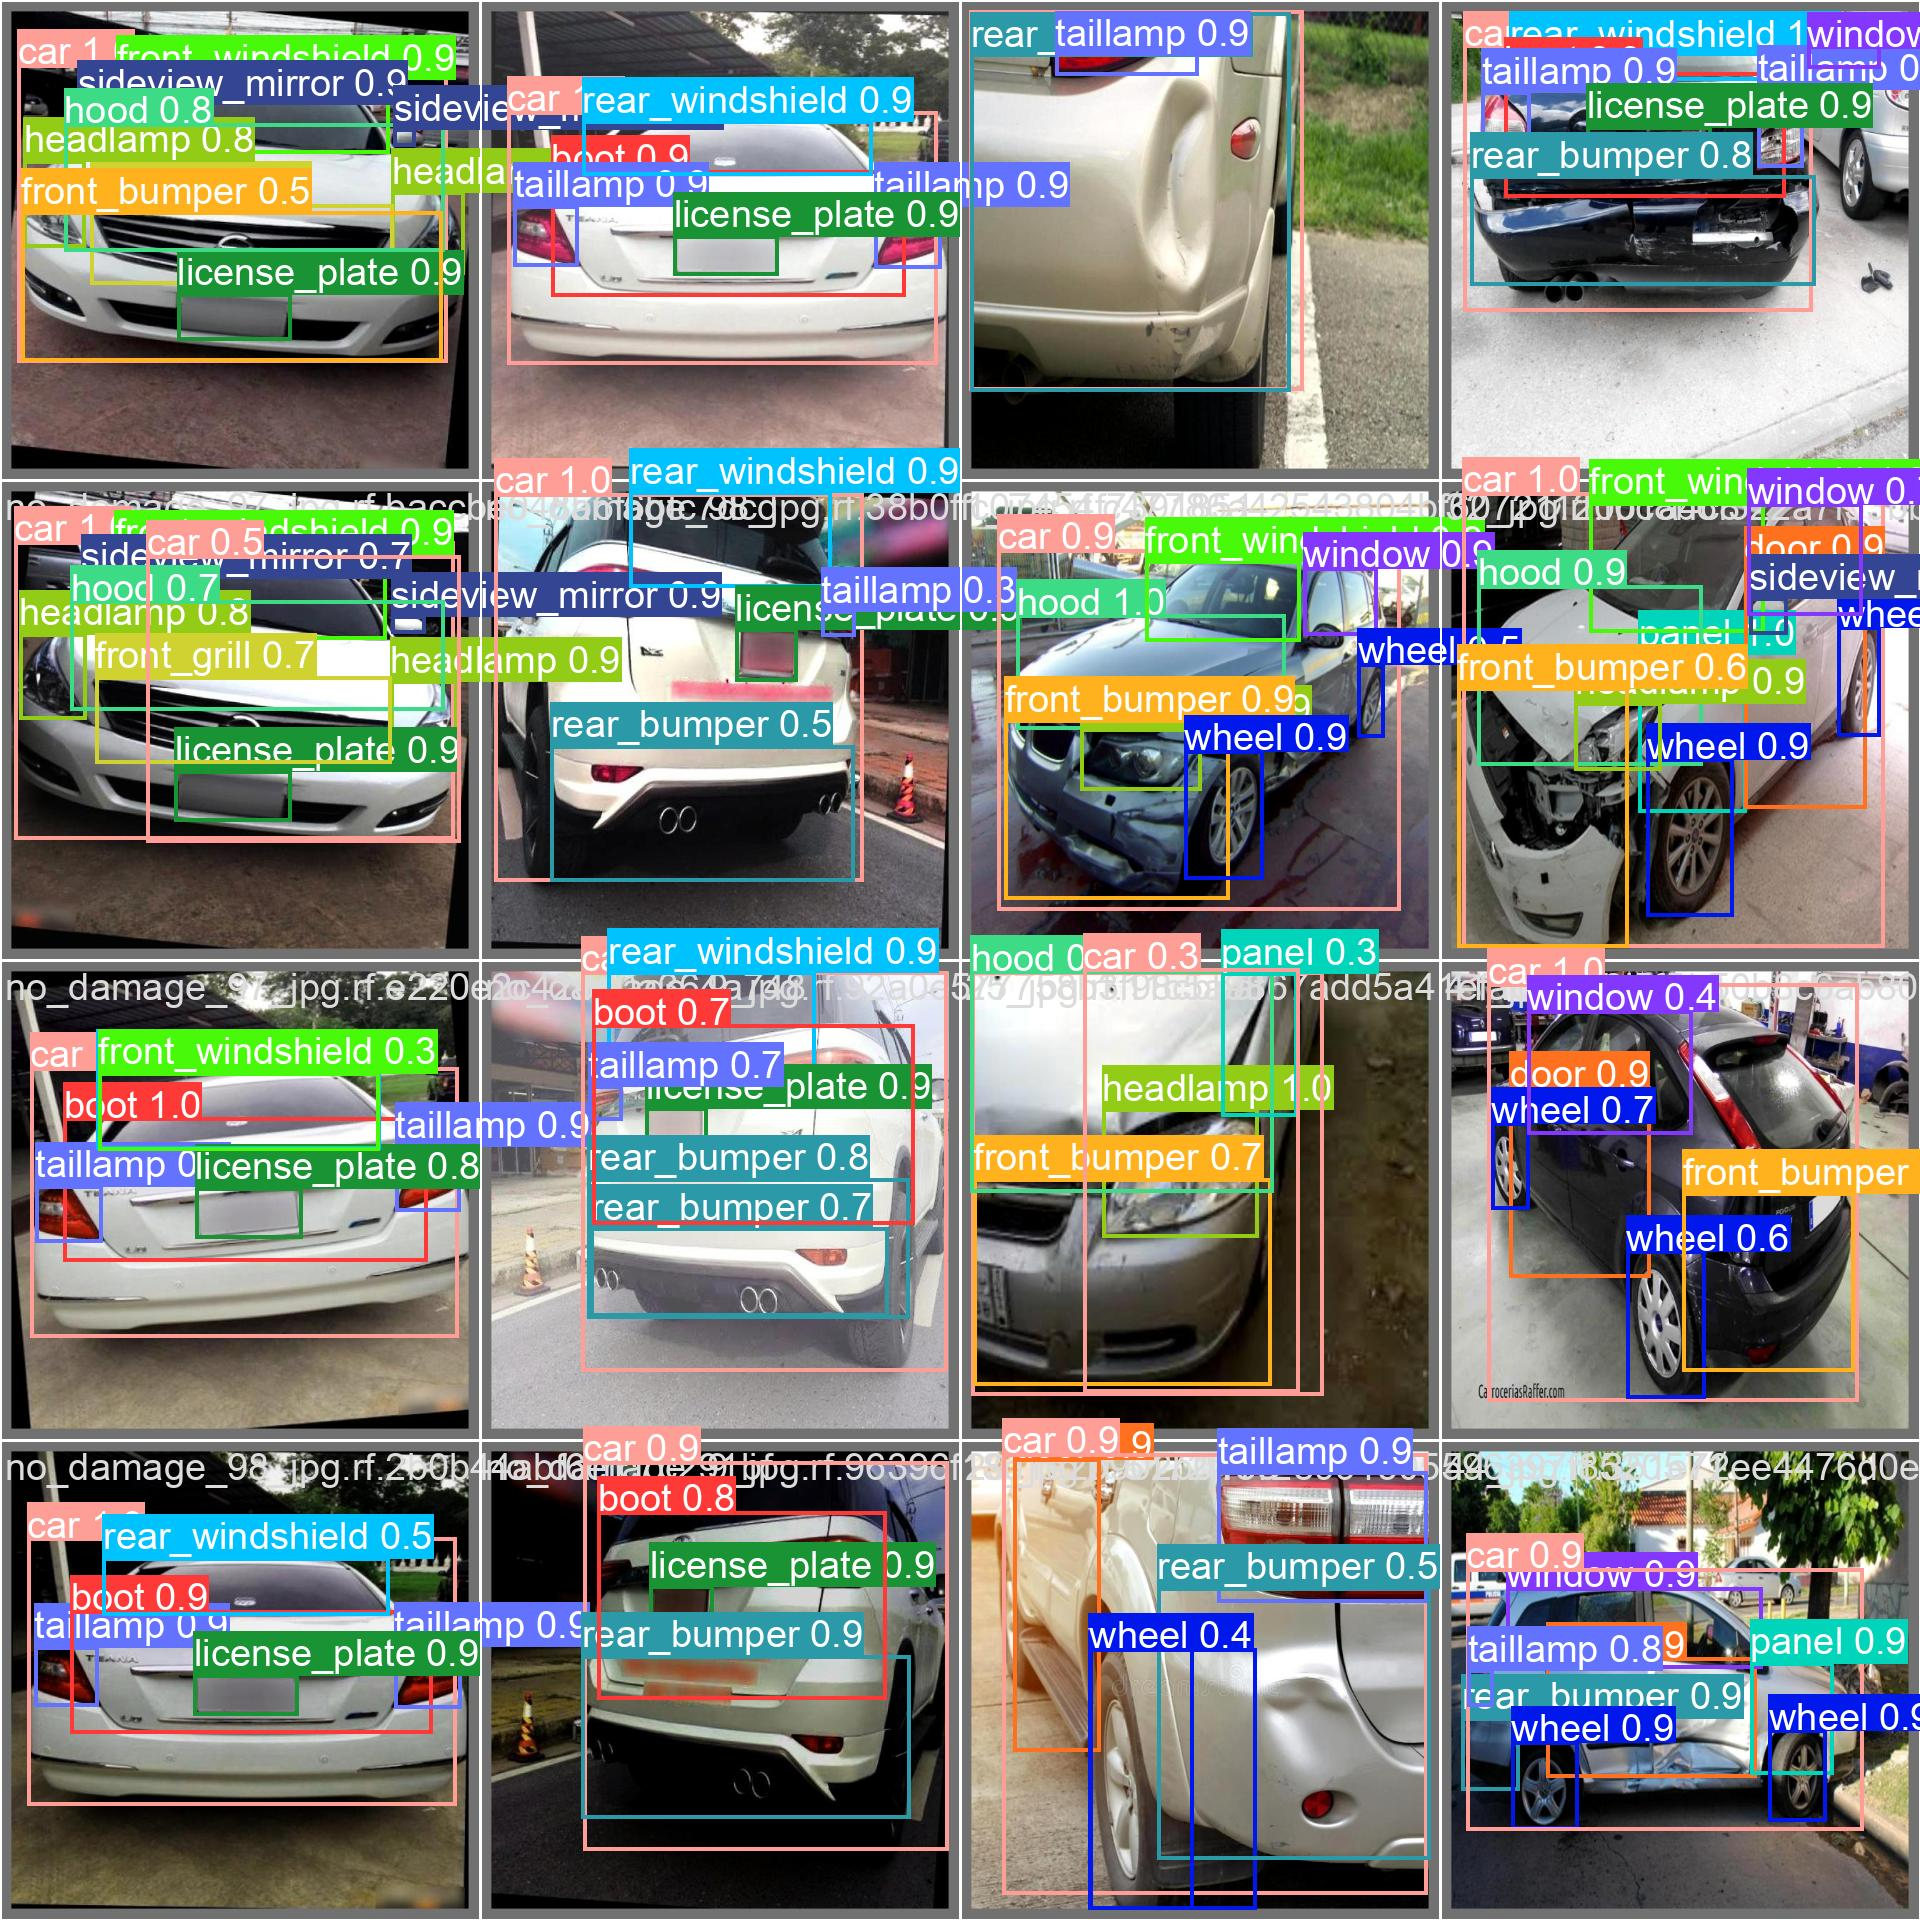

In [22]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

2024-07-12 09:40:22.995331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 09:40:22.995381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 09:40:22.996928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 09:40:23.005041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 09:40:24.290374: W tensorflow/comp

## Inference with Custom Model

In [25]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images

2024-07-12 09:41:42.339068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 09:41:42.339114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 09:41:42.340478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 09:41:42.348026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 09:41:43.535717: W tensorflow/comp

**NOTE:** Let's take a look at few results.

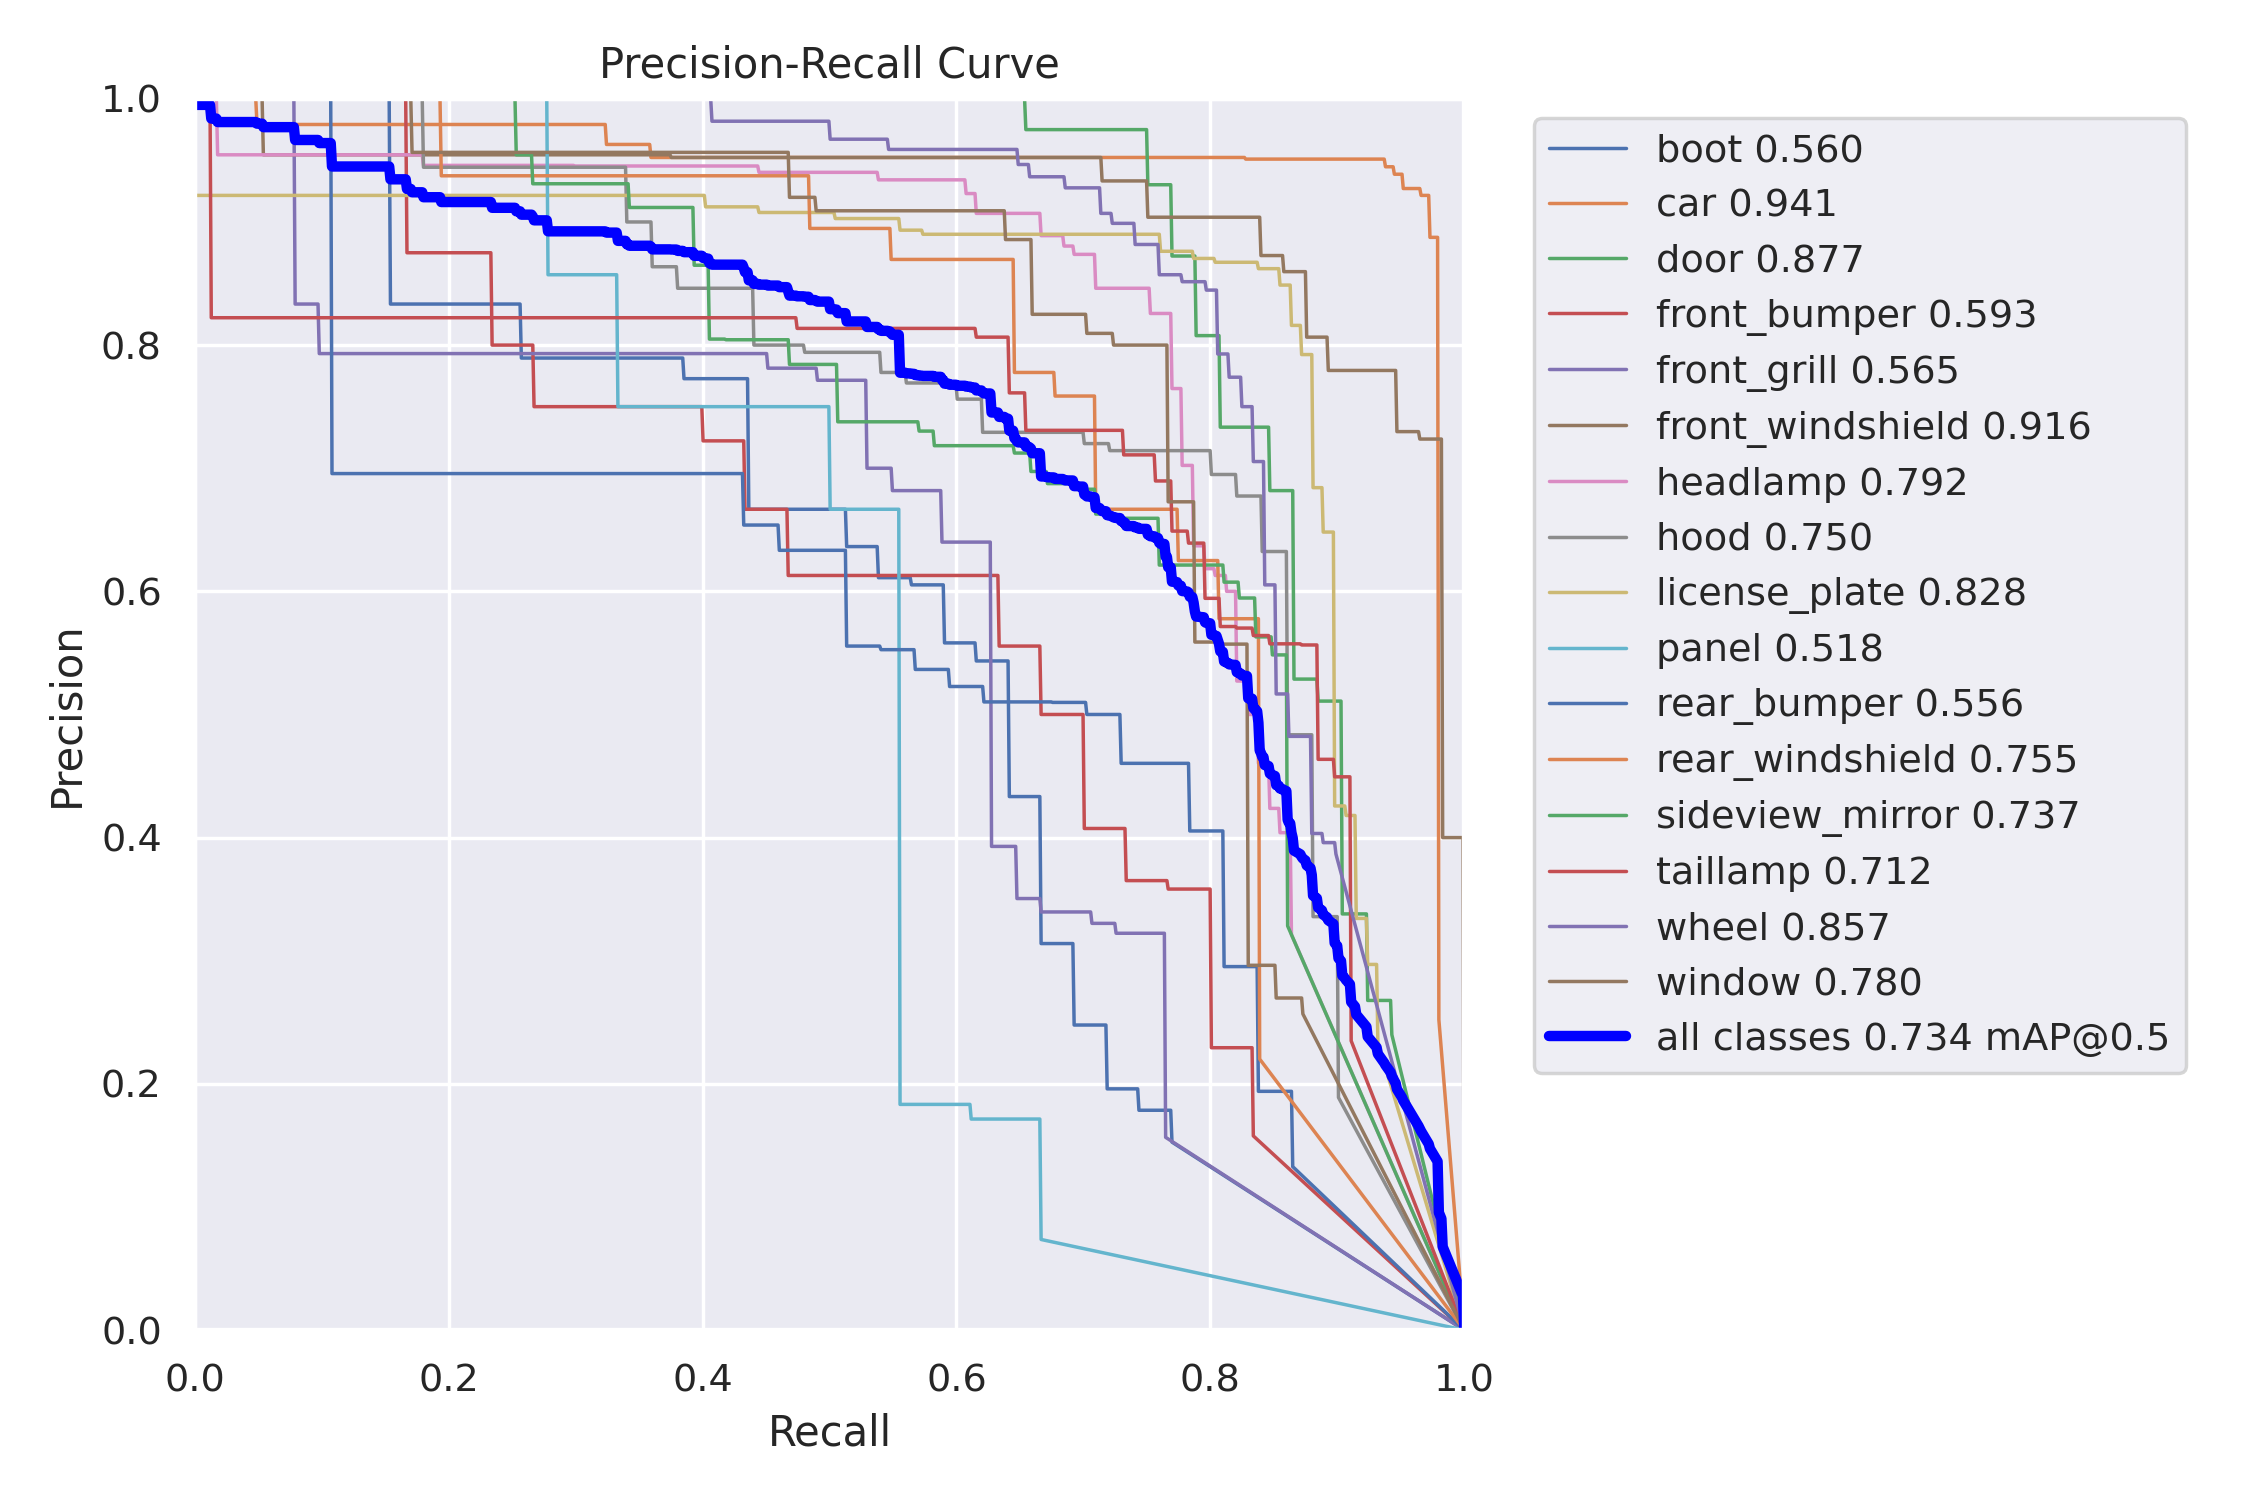

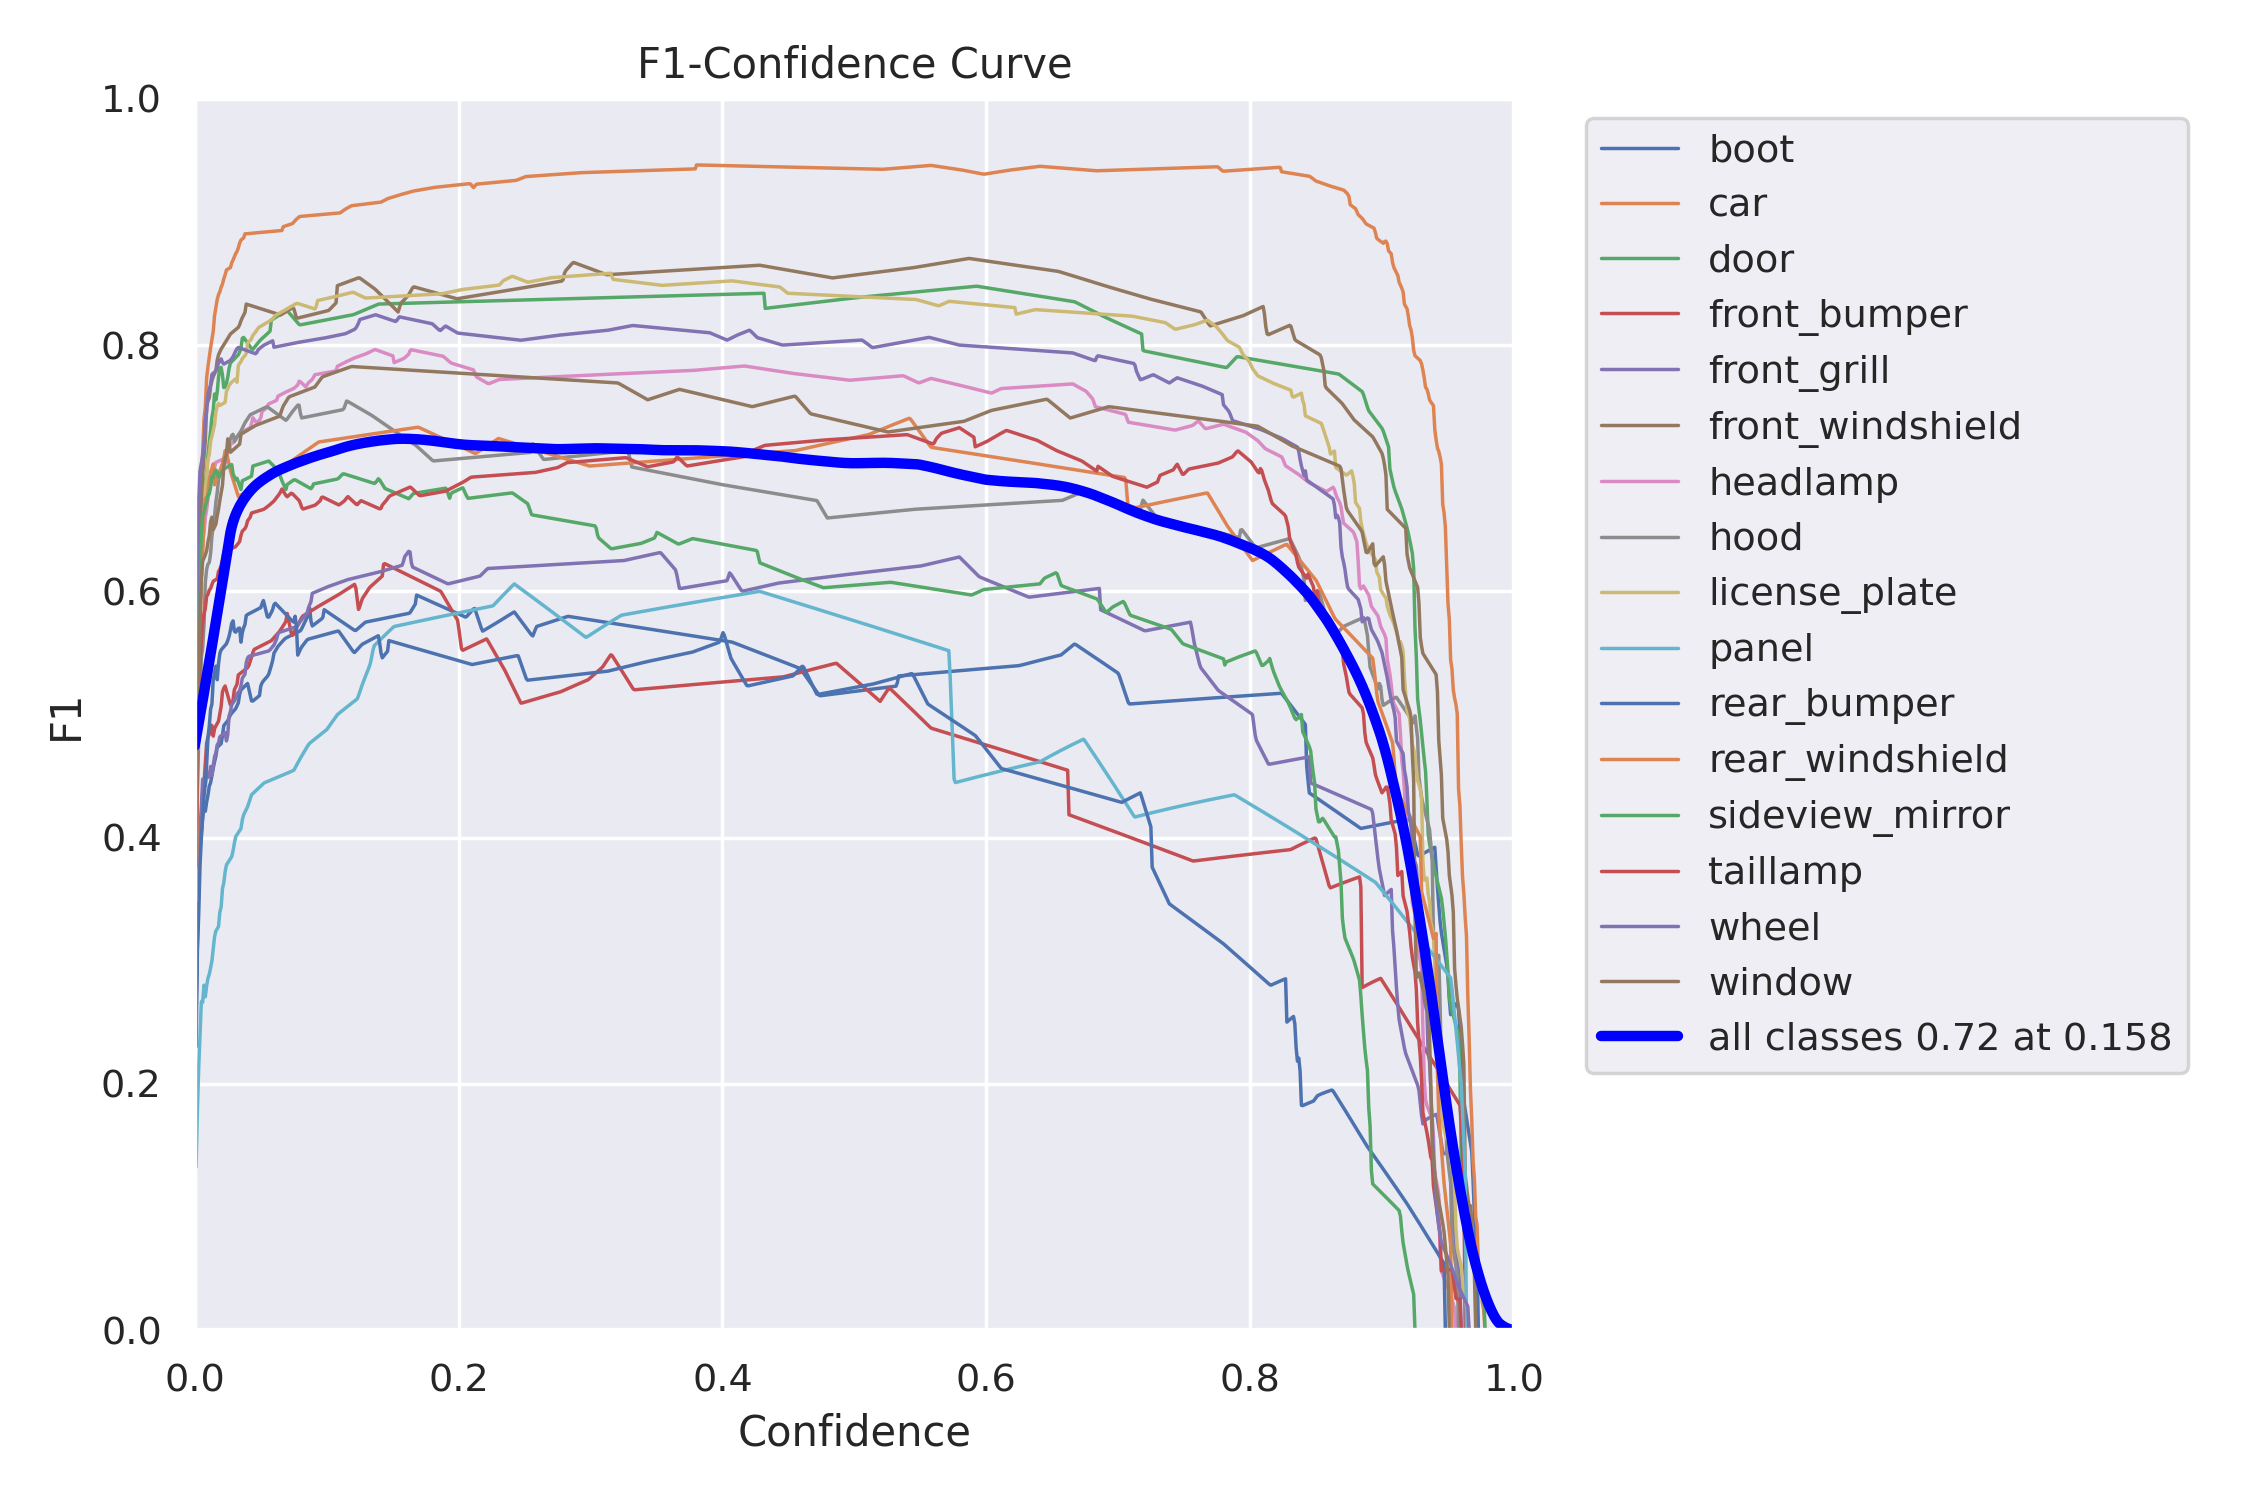

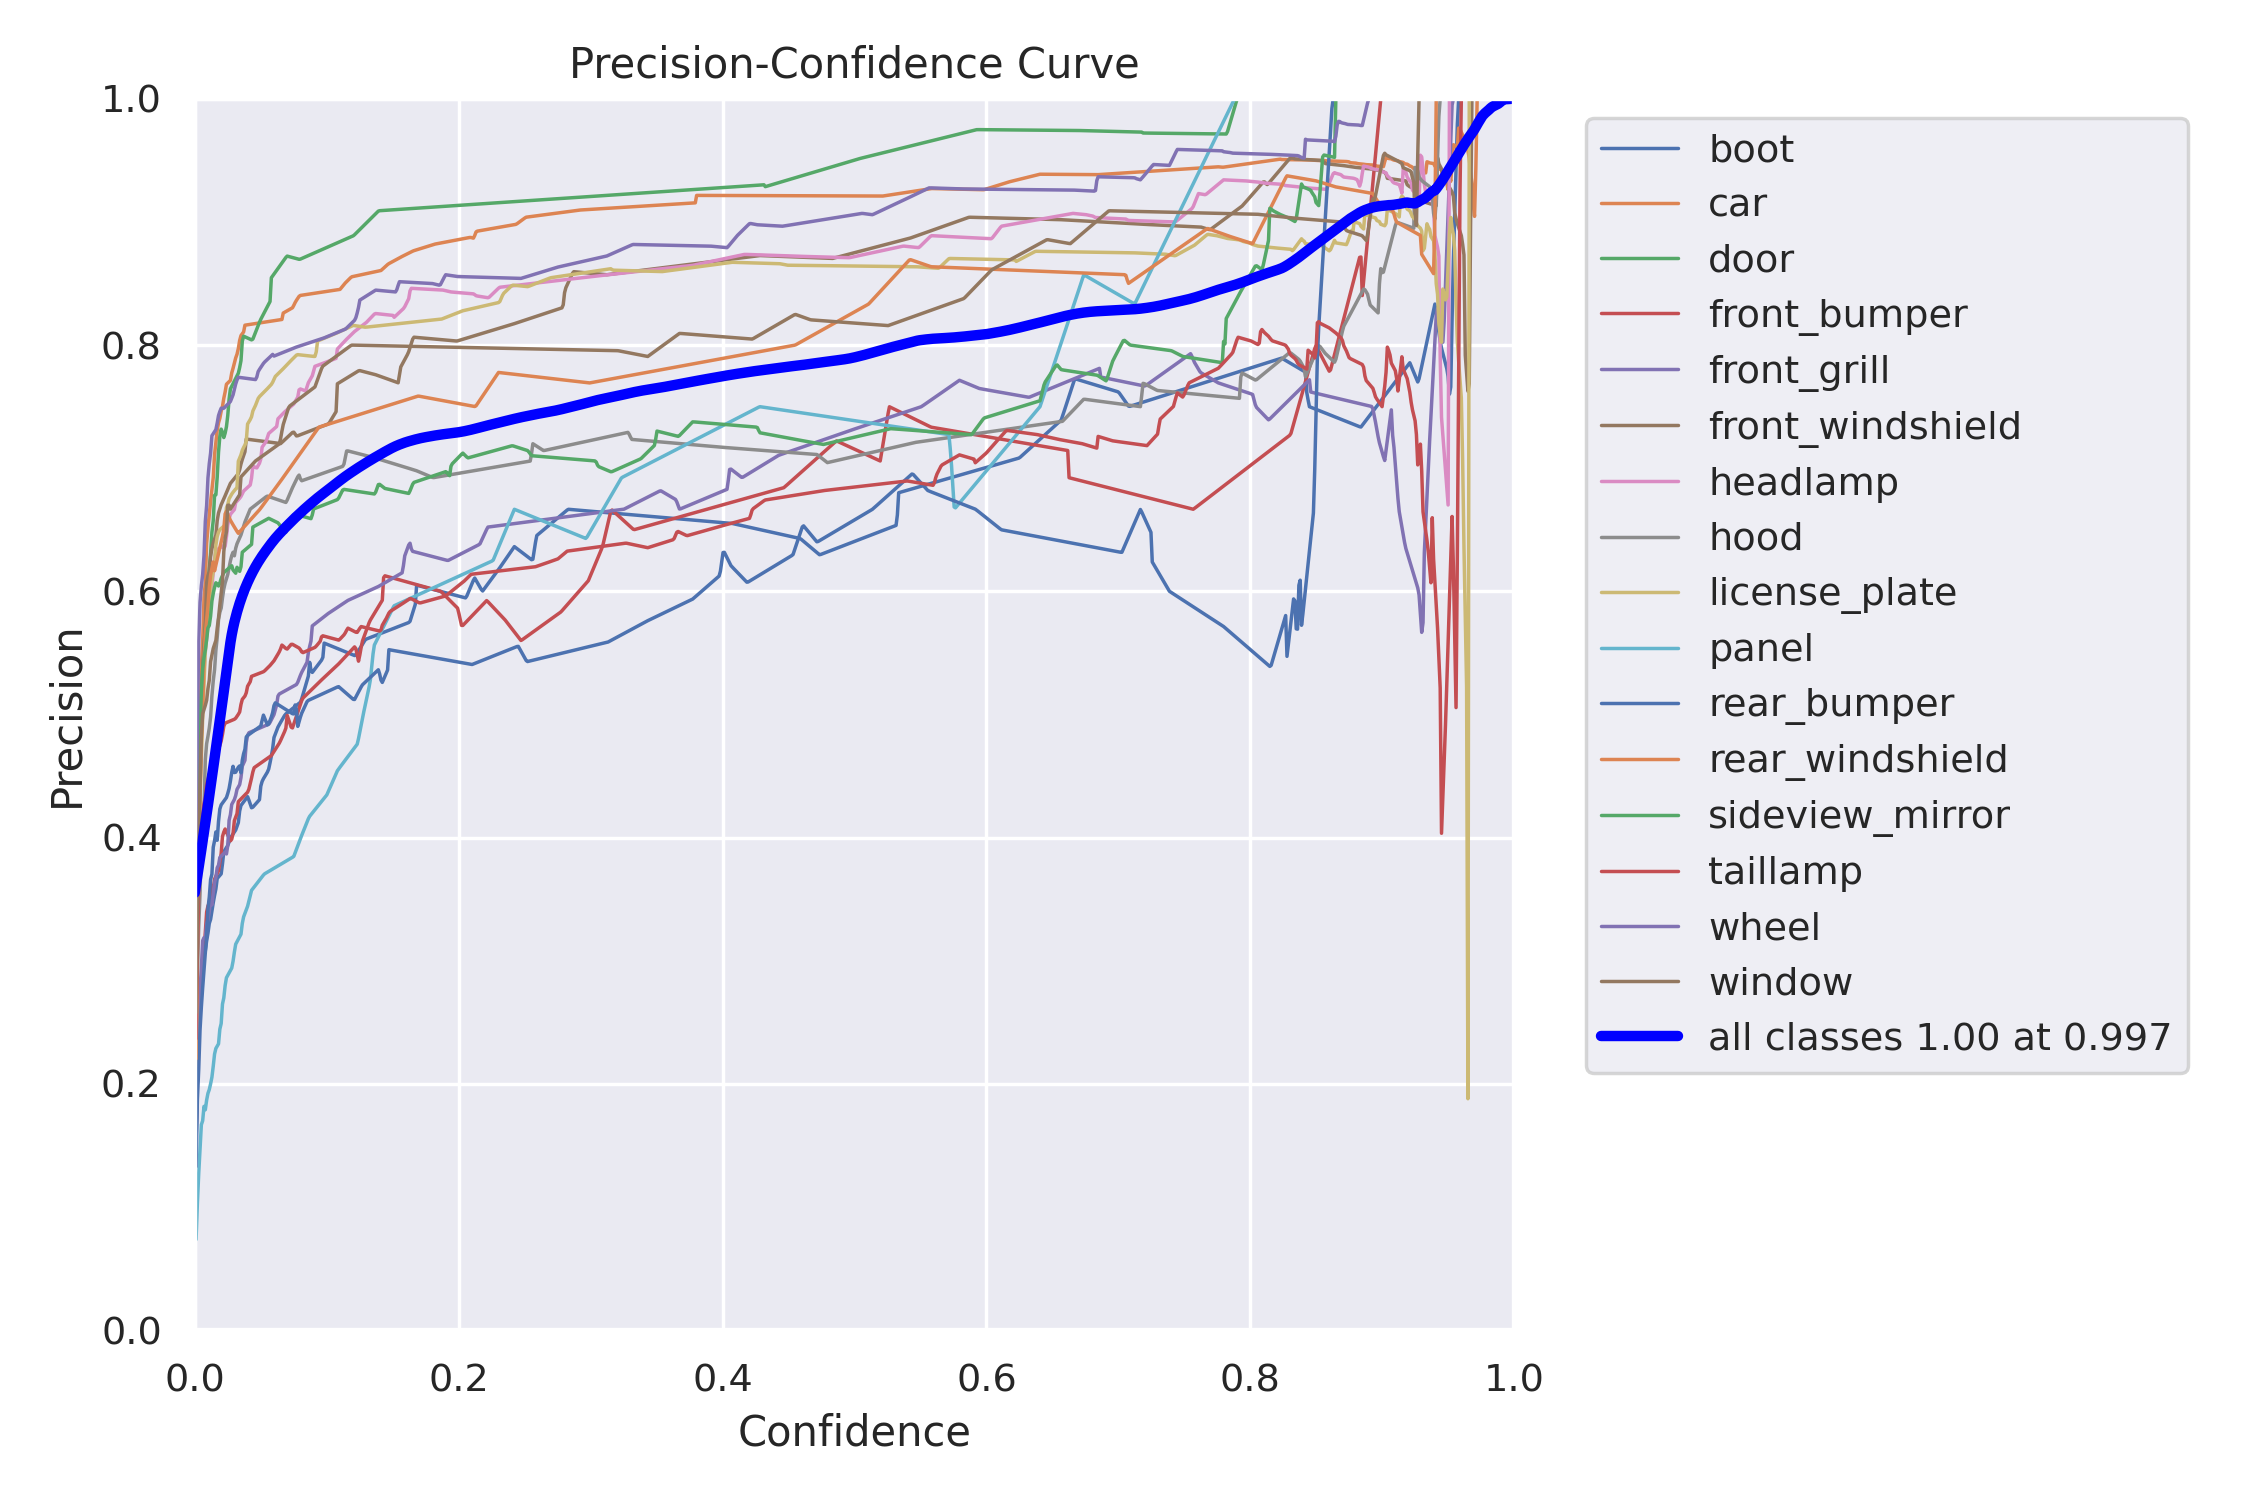

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/train2/*.png')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")